In [2]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import gensim as gensim

line = np.array('altijd november altijd regen altijd dit lege hart altijd'.split())
enc = OneHotEncoder()
data = enc.fit_transform(line.reshape(-1, 1))

corpus = {'altijd':1, 'dit':2, 'hart':3, 'lege':4, 'november':5, 'regen':6}
data = [corpus[k] for k in line]

model_BioSentVec = gensim.models.KeyedVectors.load_word2vec_format('/data/datasets/thema10/BioSentVec.vec.bin', binary=True)

#kijken of het model goed is geladen
len(model_BioSentVec.key_to_index) #16_545_452


KeyboardInterrupt: 

In [ ]:
a = model_BioSentVec['cancer']
b = model_BioSentVec['male']

print(type(a))
b.shape


<class 'numpy.ndarray'>


(200,)

In [ ]:
def cosine_similarity(a,b):
    dot_product = np.dot(a,b)
    norm_vec1 = np.linalg.norm(a)
    norm_vec2 = np.linalg.norm(b)
    return dot_product / (norm_vec1 * norm_vec2)

print(cosine_similarity(a,b))

0.30956107


In [ ]:
text = "Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis."

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
import string

def preprocess_sentence(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower().split()
    
    text = [token for token in text if token not in stop_words]

    return text

sentence = preprocess_sentence(text)
print(sentence)


['breast', 'cancers', 'her2', 'amplification', 'higher', 'risk', 'cns', 'metastasis', 'poorer', 'prognosis']


[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/blkoobs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def embed_sentence(sentence, model):
    """
    Embed een zin door de gemiddelde vector van de woorden te nemen.
    Woorden die niet in het model zitten, worden overgeslagen.
    """
    words = sentence.split()  # Simpele tokenisatie
    word_vectors = {word:model[word] for word in words if word in model}
    
    if not word_vectors.values():
        raise ValueError("Words not recognised by model")
    
    # Neem het gemiddelde van de woordvectoren
    #embedding = np.mean(word_vectors, axis=0)
    return word_vectors

In [ ]:
def compute_pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    covariance_matrix = np.cov(X_centered, rowvar=False)
    
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    top_eigenvectors = eigenvectors[:, :n_components]
    X_reduced = np.dot(X_centered, top_eigenvectors)

    return X_reduced

In [ ]:
zin1 = "Breast cancers with HER2 amplification have a higher risk of CNS metastasis and poorer prognosis."
zin2 = "Breast cancers with HER2 amplification are more aggressive, have a higher risk of CNS metastasis, and poorer prognosis."
zin3 = "Furthermore, increased CREB expression in breast tumors is associated with poor prognosis, shorter survival and higher risk of metastasis."
word_list = []

for zin in [zin1,zin2,zin3]:
    X = embed_sentence(zin, model_BioSentVec)
    word_list.append(X)
word_matrix = np.array(word_list)
print(word_matrix.shape)

#compute_pca(X, n_components=2)


[{'cancers': array([ 0.2806   ,  0.57805  ,  0.34261  ,  0.17973  , -0.022525 ,
         0.28235  , -0.35403  ,  0.14953  ,  0.44312  ,  0.35016  ,
        -0.6143   ,  0.23906  , -0.19695  ,  0.070693 ,  0.054513 ,
        -0.17109  , -0.38931  , -0.043566 ,  0.39539  ,  0.053432 ,
        -0.78265  ,  0.26561  , -0.4872   , -0.651    , -0.59415  ,
         0.67062  , -0.3129   , -0.26214  ,  0.25993  ,  0.020946 ,
         0.29544  ,  0.078369 , -0.46665  , -0.4051   ,  0.3635   ,
        -0.040752 ,  0.82851  ,  0.24267  ,  0.11796  ,  0.75291  ,
        -0.10158  ,  0.3618   , -0.26606  ,  0.32823  , -0.63818  ,
         0.35312  ,  0.64807  , -0.08633  , -0.060099 ,  0.455    ,
         0.22803  , -0.17932  , -0.33042  ,  0.069724 , -0.12252  ,
         0.34188  ,  0.094797 ,  0.56524  , -0.50157  , -0.24139  ,
         0.41078  , -0.34463  , -0.75714  , -0.43218  ,  0.94288  ,
         0.35564  ,  0.74512  ,  0.030567 ,  0.50375  ,  0.47415  ,
        -0.15766  ,  0.098653 ,  0.2

In [ ]:
def gensim_similarity(model, sentence1, sentence2, sentence3):
    similarity1_2 = model.n_similarity(sentence1, sentence2)
    similarity1_3 = model.n_similarity(sentence1, sentence3)
    similarity2_3 = model.n_similarity(sentence2, sentence3)
    return similarity1_2, similarity1_3, similarity2_3
print(gensim_similarity(model_BioSentVec,zin1,zin2,zin3))

def cosine_similarity_sentence(zin):
    #berekent gemiddelde verschil tussen woorden in zin
    zin = preprocess_sentence(zin)
    total = 1
    for i in zin:
        for j in zin:
            if not i == j:
                try:
                    ival = model_BioSentVec[i]
                    jval = model_BioSentVec[j]
                except:
                    break
                total = (total + cosine_similarity(ival,jval)) /2
    return total

for zin in (zin1,zin2,zin3):
    print((cosine_similarity_sentence(zin)))

(0.9986522, 0.99670434, 0.9972753)
0.5318205046068396
0.5350058405475502
0.3315665647101039


TypeError: unhashable type: 'dict'

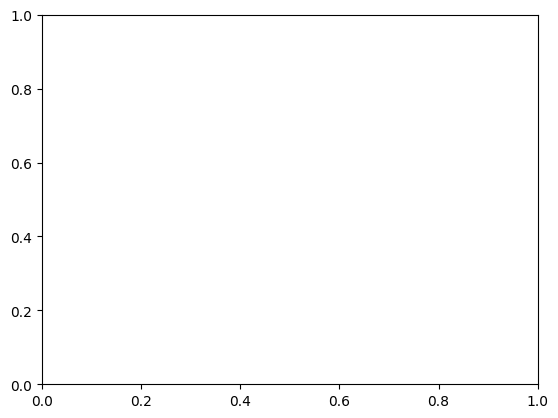

In [ ]:
import matplotlib.pyplot as plt
data = ['cancer','risk','metastasis','prognosis','tumors','survival','benign','malignant']

model['cancer'].shape #ndarray(200,)
the_array = np.array([model[x] for x in data] ) # shape = (8,200)
pca_array = compute_pca(the_array, 2)


#print(word_matrix)

#indices = np.arange(len(word_matrix))


plt.scatter(pca_array[:,0], pca_array[:,1])
#plt.annotate()
plt.show()